# Analiza danych w języku Python - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika. Wyjątek stanowi ostatni z projektów, gdzie po konsultacji z prowadzącym zajęcia możliwa jest większa swoboda w doborze pakietów.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/>
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/>
`YOUR ANSWER HERE`<br/>
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

## Zestaw zadań 4: Wstęp do analizy danych przestrzennych (Notatnik 2/2)

In [19]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as cx

In [5]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
%%capture
if 'google.colab' in str(get_ipython()):
  !pip install contextily

### Wczytanie danych
Poniższy kod wczytuje do zmiennych `rivers`, `cities`, `districts` oraz `voivodeships` dane z przygotowanego wcześniej pliku data.gpkg.

In [6]:
rivers = gpd.read_file("data.gpkg", layer='rivers')
cities = gpd.read_file("data.gpkg", layer='cities')
districts = gpd.read_file("data.gpkg", layer='districts')
voivodeships = gpd.read_file("data.gpkg", layer='voivodeships')

### Zadanie 4: Wykorzystanie prostych operacji geometrycznych (12 pkt)

#### a) Miasta blisko Wisły

Korzystając z funkcji `geopandas.GeoSeries.buffer()` oraz `geopandas.GeoSeries.within()` sprawdź, które miasta leżą bliżej niż 20 km od Wisły oraz:
 - zapisz wyniki do tablicy `cities` w kolumnie o nazwie "Blisko Wisły" (True/False),
 - oblicz ile miast leży bliżej niż 20 km od Wisły i zapisz wynik do zmiennej `cities_close_to_vistula`,
 - korzystając z funkcji `print()` wyświetl odpowiedź na pytanie (pełnym zdaniem) ile miast leży bliżej niż 20 km od Wisły,
 - przygotuj wizualiację, na której oznaczony zostanie obszar znajdujący się bliżej niż 20 km od Wisły, a znajdujące się w tym obszarze miasta będą wyróżnione kolorem względem pozostałych miast.

Wizualizacja powinna zawierać:
- województwa, wypełnione jednolitym kolorem,
- miasta, w jednym z dwóch wybranych kolorów w zależności od spełnienia analizowanego kryterium.
- rzeki wypełnione jednolitym kolorem,
- oznaczenie terenu leżącego nie dalej niż 20 km od Wisły.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [7]:
rivers

,Nazwa,geometry
0,Odra,"MULTILINESTRING ((393160.062 195086.116, 39323..."
1,Wisła,"MULTILINESTRING ((500265.481 193171.33, 500244..."


In [8]:
vistula_range = rivers[rivers['Nazwa'] == 'Wisła'].unary_union.buffer(20000)
mask = cities.within(vistula_range)
cities_close_to_vistula = len(cities[mask].copy())
cities_close_to_vistula

<ipython-input-8-5cbc4fbd64b5>:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  vistula_range = rivers[rivers['Nazwa'] == 'Wisła'].unary_union.buffer(20000)


148

In [9]:
# Komórka testowa
assert cities_close_to_vistula == 148

In [10]:
cities['Blisko Wisły'] = cities.geometry.within(vistula_range)

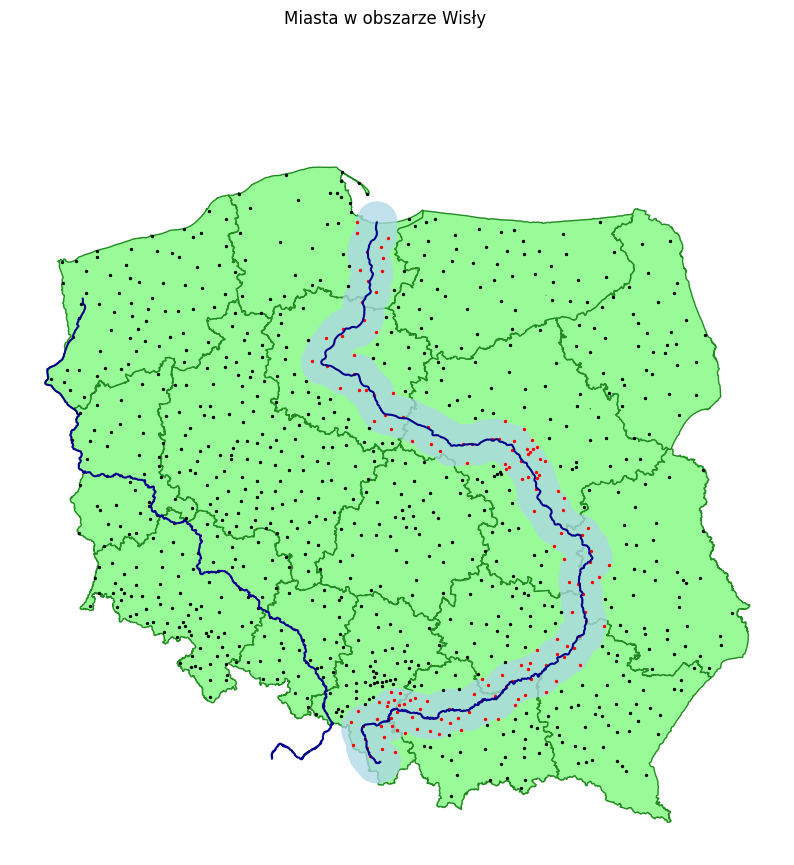

In [11]:
# Wizualizacja
fig, ax = plt.subplots(figsize=(10, 10))
voivodeships.plot(ax=ax, facecolor='palegreen', edgecolor='forestgreen')
rivers.plot(ax=ax, color='darkblue')
gpd.GeoSeries([vistula_range]).plot(ax=ax, color='lightblue', alpha=0.75, edgecolor='none')
cities[cities['Blisko Wisły'] == True].plot(ax=ax, color='red', markersize=2)
cities[cities['Blisko Wisły'] == False].plot(ax=ax, color='black', markersize=2)
fig.suptitle('Miasta w obszarze Wisły')
ax.set_axis_off()
plt.show()

#### b) Województwa, przez które przepływa Odra
Korzystając z funkcji `geopandas.GeoSeries.intersects()` sprawdź, przez które województwa przepływa Odra oraz:
 - zapisz wyniki do tablicy `voivodeships` w kolumnie o nazwie "Odra w obrębie" (True/False) oraz do zmiennej `voivodeships_with_oder` (lista województw, przez które przepływa Odra),
 - korzystając z funkcji `print()` wyświetl odpowiedź na pytanie (pełnym zdaniem) przez które województa przepływa Odra,
 - przygotuj wizualiację, na której województwa przez które przepływa Odra będą wyróżnione kolorem względem pozostałych województw.

Wizualizacja powinna zawierać:
- województwa, wypełnione jednym z dwóch wybranych kolorów w zależności od spełnienia analizowanego kryterium,
- miasta, wypełnione jednolitym kolorem,
- rzeki wypełnione jednolitym kolorem.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [12]:
# Obliczenia
odra = rivers[rivers['Nazwa'] == 'Odra'].unary_union
voivodeships['Odra w obrębie'] = voivodeships.geometry.intersects(odra)
voivodeships_with_oder = voivodeships[voivodeships['Odra w obrębie'] == True]['Nazwa']
voivodeships[['Nazwa', 'Odra w obrębie']]

<ipython-input-12-c3cc6504995e>:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  odra = rivers[rivers['Nazwa'] == 'Odra'].unary_union


,Nazwa,Odra w obrębie
0,dolnośląskie,True
1,kujawsko-pomorskie,False
2,lubelskie,False
3,lubuskie,True
4,łódzkie,False
5,małopolskie,False
6,mazowieckie,False
7,opolskie,True
8,podkarpackie,False
9,podlaskie,False


In [13]:
# Komórka testowa
assert sorted(voivodeships_with_oder) == ['dolnośląskie', 'lubuskie', 'opolskie', 'zachodniopomorskie', 'śląskie']

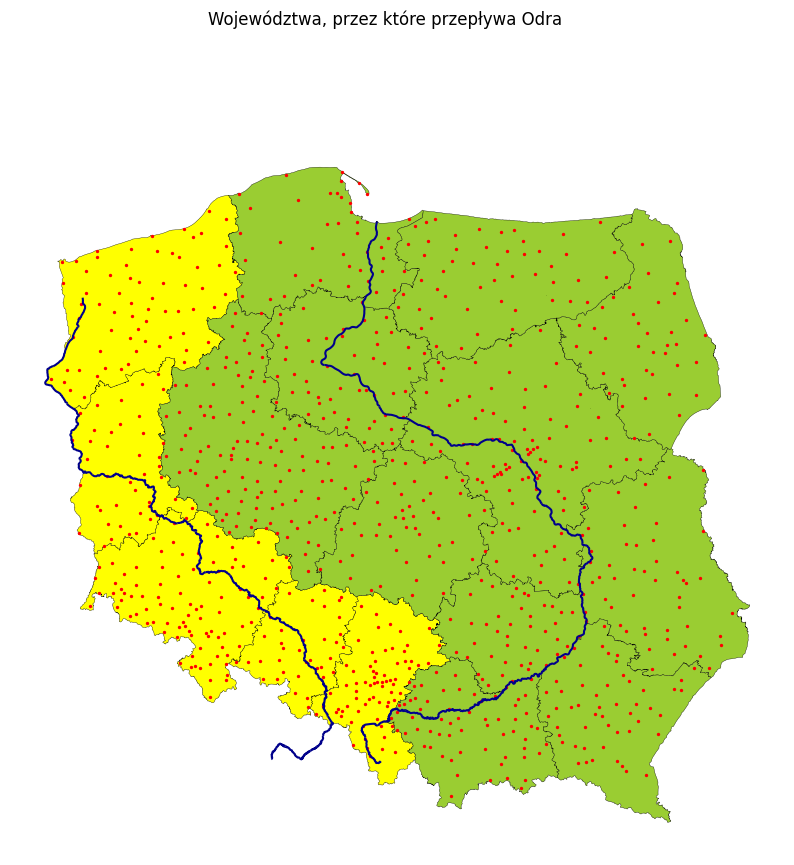

In [14]:
# Wizualizacja
fig, ax = plt.subplots(figsize=(10, 10))
voivodeships[voivodeships['Odra w obrębie'] == True].plot(ax=ax, facecolor='yellow', edgecolor='black', linewidth=0.25)
voivodeships[voivodeships['Odra w obrębie'] == False].plot(ax=ax, facecolor='yellowgreen', edgecolor='black', linewidth=0.25)
cities.plot(ax=ax, markersize=2, color='red')
rivers.plot(ax=ax, color='darkblue')
ax.set_axis_off()
plt.suptitle('Województwa, przez które przepływa Odra')
plt.show()

#### c) Liczba miast w powiatach

Korzystając z funkcji `geopandas.sjoin()` oraz odpowiednich funkcji pakietu pandas policz ile miast znajduje się w poszczególnych powiatach oraz:
 - zapisz wyniki do tablicy `districts` w kolumnie o nazwie "Liczba miast",
 - przygotuj wizualiację, na której kolor przypisany powiatom jest powiązany z liczbą miast leżących w ich obrębie.

Wizualizacja powinna zawierać:
- powiaty, wypełnione kolorem powiązanym z liczbą miast leżących w ich obrębie (ciągła skala kolorów),

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [15]:
joined = gpd.sjoin(cities, districts, how='inner')
city_counts = joined.groupby('index_right').size()
districts['Liczba miast'] = districts.index.map(city_counts).fillna(0).astype(int)

In [16]:
# Komórka testowa
assert type(districts) == gpd.geodataframe.GeoDataFrame
assert districts.shape == (380, 3)
assert set(list(districts.columns)) == set(['Nazwa', 'geometry', 'Liczba miast'])
assert districts.crs == "epsg:2180"

assert districts.loc[districts["Nazwa"]=="kłodzki", "Liczba miast"].values[0] == 11
assert districts.loc[districts["Nazwa"]=="białostocki", "Liczba miast"].values[0] == 9
assert districts.loc[districts["Nazwa"]=="suwalski", "Liczba miast"].values[0] == 0

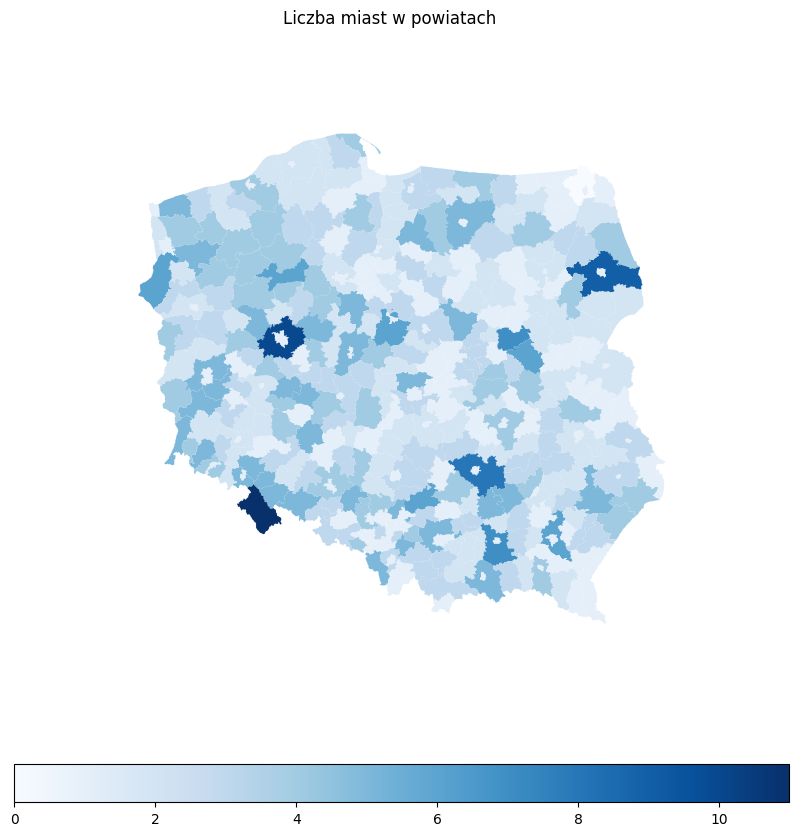

In [17]:
# Wizualizacja
fig, ax = plt.subplots(figsize=(10, 10))
districts.plot(ax=ax, column='Liczba miast', cmap='Blues', legend=True, legend_kwds={"orientation": "horizontal"})
ax.set_axis_off()
plt.suptitle('Liczba miast w powiatach')
plt.show()

### Zadanie 5: Wizualizacje z wykorzystaniem map podkładowych (5 pkt)

#### a) Wizualizacja z mapą w tle

Korzystając z funkcji pakietu matplotlib, funkcji `geopandas.GeoDataFrame.plot()` oraz funkcji `contextily.add_basemap()` przygotuj figurę, na której półprzeźroczyste poligony województw będą nałożone na wybraną (i inną niż domyślna) mapę topograficzną. Wybierz dokładność mapy topograficznej tak, żeby nie była rozpikselowana, ale jednocześnie nie wczytywała się nadmiernie długo.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

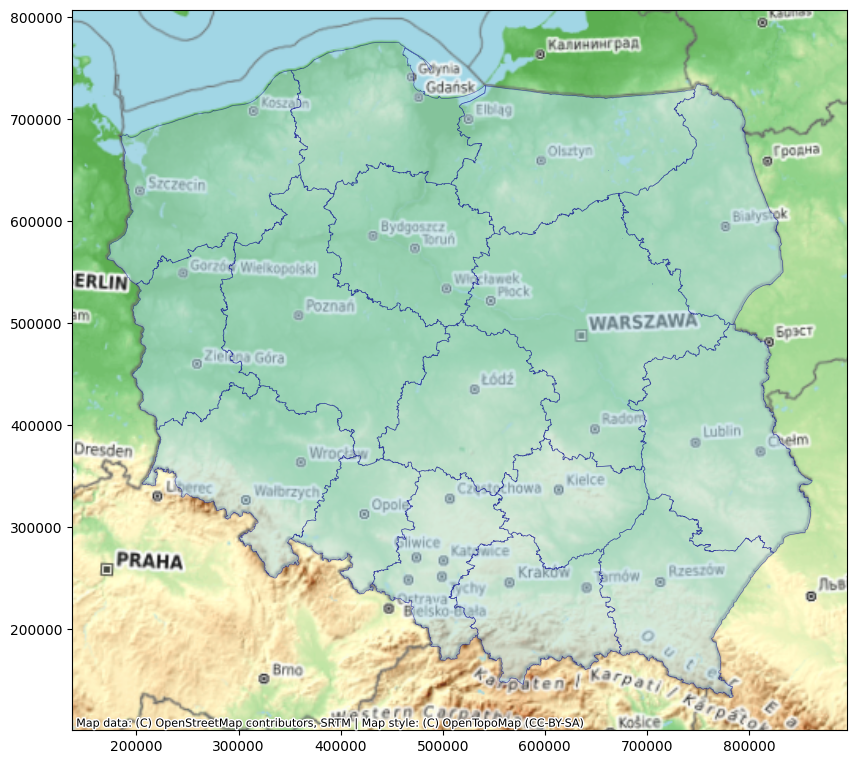

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
voivodeships.plot(ax=ax, alpha=0.5, facecolor='lightblue', edgecolor='darkblue', linewidth=0.5)
cx.add_basemap(ax=ax, source=cx.providers.OpenTopoMap, crs=voivodeships.crs.to_string(), alpha=0.9)
plt.show()

#### b) Interaktywna wizualizacja

Korzystając z funkcji `geopandas.GeoDataFrame.explore()` wykonaj interaktywną mapę, taką że:
 - kolor województw jest związany z ich powierzchnią,
 - po najechaniu myszką na obszar województwa wyświetla się jego nazwa,
 - po kliknięciu na obszar województwa wyświetla się lista 4 informacji związanych z produkcją i zużyciem energii na terenie danego województwa,
 - w tle znajduje się samodzielnie wybrana (inna od domyślnej) mapa.

In [20]:
pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 4.1 MB/s eta 0:00:00


In [22]:
voivodeships.explore(
  column="Powierzchnia ogółem [ha]",
  tooltip=["Nazwa"],
  popup=[
    "Nazwa",
    "Produkcja energii elektrycznej [GWh]",
    "Zużycie energii elektrycznej [GWh]",
    "Udział energii odnawialnej w produkcji energii elektrycznej [%]",
    "Stosunek produkcji energii elektrycznej do zużycia energii elektrycznej [%]"
  ],
  cmap="YlGnBu"
)

Output hidden; open in https://colab.research.google.com to view.